In [1]:
import os

from matplotlib import patches as patches
from easydict import EasyDict as edict
from matplotlib import pyplot as plt
import torch

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
LOG_PATH  = f'{ROOT_PATH}/phenaki/phenaki/results/Paella_Test/log.pt'

In [3]:
def texting_min_max(ax, list_, gmax, gmin, type_ = 'loss'):

    for idx in range(0, 10_000 * (steps // 10_000 + 1), 10_000):
        ax.axvline(x = idx, color = 'r', linestyle = ':')

    interval         = [list_[idx * 5 : (idx + 1) * 5] 
                        for idx in range(len(list_)//5)]
    interval_min     = [min(loss) for loss in interval]
    interval_min_idx = [list_.index(loss) for loss in interval_min] 
    
    interval_max     = [max(loss) for loss in interval]
    interval_max_idx = [list_.index(loss) for loss in interval_max] 
    
    for min_idx, max_idx, min_, max_ in zip(interval_min_idx, interval_max_idx, interval_min,  interval_max):

        if min_ == gmin:
            ax.add_patch(patches.Ellipse((min_idx *2000, min_), height = 0.5 if type_ == 'loss' else 0.03, 
                                          width = 1000, edgecolor = 'black', fill = True, color = 'yellow'))

        if max_ == gmax:
            ax.add_patch(patches.Ellipse((max_idx *2000, max_), height = 0.5 if type_ == 'loss' else 0.03, 
                                          width = 1000, edgecolor = 'black', fill = True, color = 'yellow'))
            
        ax.text(min_idx * 2000, min_, f'{min_:.3f}', ha = 'center')
        ax.text(max_idx * 2000, max_, f'{max_:.3f}', ha = 'center')

In [4]:
logs     = edict(torch.load(LOG_PATH))
steps    = logs.step

curr_losses = logs.curr_losses
losses      = logs.losses

curr_accuracy = logs.curr_accuracies
accuracy      = logs.accuracies

max_curr_loss     = max(curr_losses)
max_curr_loss_idx = curr_losses.index(max_curr_loss)

min_curr_loss     = min(curr_losses)
min_curr_loss_idx = curr_losses.index(min_curr_loss)

max_curr_acc      = max(curr_accuracy)
max_curr_acc_idx  = curr_accuracy.index(max_curr_acc)

min_curr_acc      = min(curr_accuracy)
min_curr_acc_idx  = curr_accuracy.index(min_curr_acc)

/tmp/ipykernel_3398204/955198278.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Ellipse((min_idx *2000, min_), height = 0.5 if type_ == 'loss' else 0.03,
/tmp/ipykernel_3398204/955198278.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Ellipse((max_idx *2000, max_), height = 0.5 if type_ == 'loss' else 0.03,


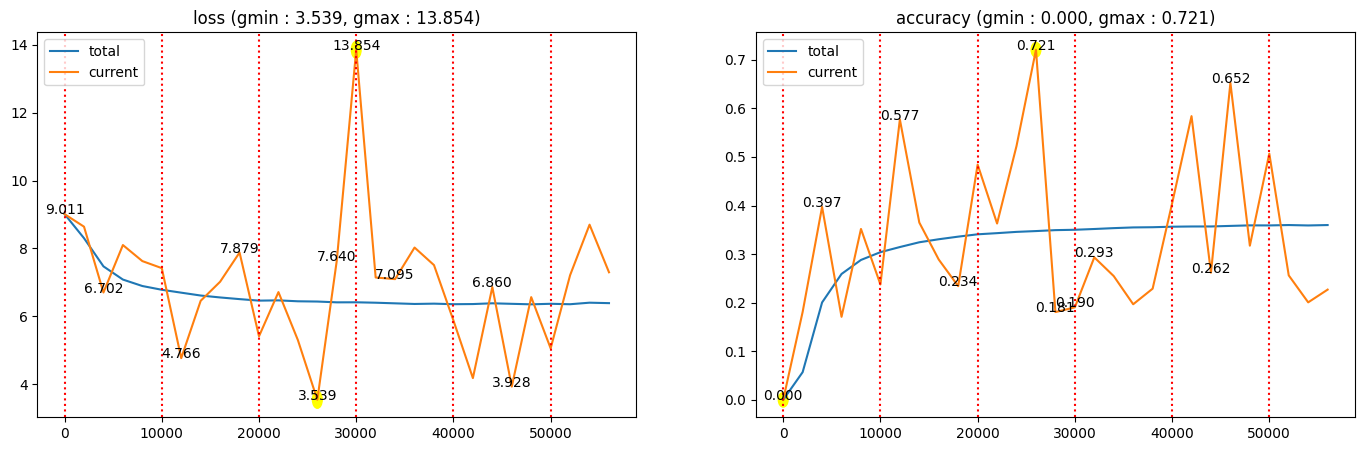

In [5]:
steps_   = [step for step in range(0, steps + 1, 2000)]
_, axes = plt.subplots(1, 2, figsize = (17, 5))

axes[0].plot(steps_, losses, label = 'total')
axes[0].plot(steps_, curr_losses, label = 'current')
axes[0].set_title(f'loss (gmin : {min_curr_loss:.3f}, gmax : {max_curr_loss:.3f})')
axes[0].legend(loc = 'upper left')
texting_min_max(axes[0], curr_losses, max_curr_loss, min_curr_loss)


axes[1].plot(steps_, accuracy, label = 'total')
axes[1].plot(steps_, curr_accuracy, label = 'current')
axes[1].set_title(f'accuracy (gmin : {min_curr_acc:.3f}, gmax : {max_curr_acc:.3f})')
axes[1].legend(loc = 'upper left')
texting_min_max(axes[1], curr_accuracy, max_curr_acc, min_curr_acc, 'accu')